<a href="https://colab.research.google.com/github/Prisci723/InteligenciaArtificial1/blob/main/Regresion_logistica_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

El siguiente dataset cuenta con 18 características relacionadas a la estructura de un hongo, el fin de los datos es demostrar si un hongo es comestible o es venenoso.
El enlace al dataset original es: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Los features utilizados del dataset original son:


* x1: Diametro del sombrero del hongo, en cm
* x2: Forma del sombrero
* x3: Tipo de superficie
* x4: Color del sombrero
* x5: Si expulsa líquido al ser golpeado
* x6: Tipo de himenio
* x7: espacio entre himenio
* x8: color de himenio
* x9: Altura de estipe en cm
* x10: Ancho de estipe en mm
* x11: Tipo de raiz de estipe
* x12: Tipo de superficie de estipe
* x13: Color de la estipe
* x14: Si tiene anilo
* x15: Tipo de anillo
* x16: Color de las esporas
* x17: hábitat natural
* x18: Estación en la que aparece

# Tratamiento de los datos con pandas

Pandas es una librería que nos permite tratar con grandes cantidades de datos de forma más fácil y automatizada, en las siguientes partes limpiaré el dataset y haré algunos ajustes con la librería pandas.

El siguiente dataset cuenta con la mayoría de tipos de datos en categorías representados por un caracter. La librería pandas permitirá convertirlos en numéros para poder tratarlos.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd

Mounted at /content/gdrive


Primero se importa el archivo y se lo imprime, siendo leído por pandas

In [2]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/Machine learning/Datasets/Secondary_Mushroom.txt", sep=";")
print(dataframe)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

El método unique(), nos ayuda a distinguir los tipos de datos que existen en una determinada columna, por el tipo de nombre.

In [3]:
dataframe['class'].unique()

array(['u', nan], dtype=object)

Simplemente utilizando la función de replace en pandas, es que convertimos la y que es el resultado en valores 0 y 1. También se elimina dos columnas debido a que posee demasiado datos nulos que complicarán el resultado en el dataset, veil-color y veil-type.

In [4]:
#Conversión de la y a binario
dataframe['class'].replace(['p', 'e'],
                        [0, 1], inplace=True)
print(dataframe['class'][1054:1070]) #Nos permite visualizar como datos cambiaron
dataframe.drop(['veil-type', 'veil-color'], axis=1)

1054    0
1055    0
1056    0
1057    0
1058    0
1059    1
1060    1
1061    1
1062    1
1063    1
1064    1
1065    1
1066    1
1067    1
1068    1
1069    1
Name: class, dtype: int64


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,t,g,NaN,d,w
1,0,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,t,g,NaN,d,u
2,0,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,t,g,NaN,d,w
3,0,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,t,p,NaN,d,w
4,0,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,f,f,NaN,d,a
61065,0,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,f,f,NaN,d,a
61066,0,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,f,f,NaN,d,u
61067,0,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,f,f,NaN,d,u


Para poder tratar los datos y categorizarlos todos de forma automática también se puede utlizar otra librería denominada sklearn.preprocessing la cual nos permitirá colocar las cateogorias de caracterres dentro de las columnas como rangos numéricos

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
enc = OrdinalEncoder()


Dicho tratamiento se realizará utilizando el orden definido por OrdinalEncoder aplicado en todas las columnas necesarias

In [7]:
dataframe['cap-shape'] = enc.fit_transform(dataframe[['cap-shape']])
dataframe['cap-surface'] = enc.fit_transform(dataframe[['cap-surface']])
dataframe['cap-color'] = enc.fit_transform(dataframe[['cap-color']])
dataframe['does-bruise-or-bleed'] = enc.fit_transform(dataframe[['does-bruise-or-bleed']])
dataframe['gill-attachment'] = enc.fit_transform(dataframe[['gill-attachment']])
dataframe['gill-spacing'] = enc.fit_transform(dataframe[['gill-spacing']])
dataframe['gill-color'] = enc.fit_transform(dataframe[['gill-color']])
dataframe['stem-root'] = enc.fit_transform(dataframe[['stem-root']])
dataframe['stem-surface'] = enc.fit_transform(dataframe[['stem-surface']])
dataframe['stem-color'] = enc.fit_transform(dataframe[['stem-color']])
dataframe['has-ring'] = enc.fit_transform(dataframe[['has-ring']])
dataframe['ring-type'] = enc.fit_transform(dataframe[['ring-type']])
dataframe['spore-print-color'] = enc.fit_transform(dataframe[['spore-print-color']])
dataframe['habitat'] = enc.fit_transform(dataframe[['habitat']])
dataframe['season'] = enc.fit_transform(dataframe[['season']])

In [8]:
# Visualizar los datos ya cambiados
print(dataframe)

       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0         15.26        6.0          2.0        6.0   
1          0         16.60        6.0          2.0        6.0   
2          0         14.07        6.0          2.0        6.0   
3          0         14.17        2.0          3.0        1.0   
4          0         14.64        6.0          3.0        6.0   
...      ...           ...        ...          ...        ...   
61064      0          1.18        5.0          7.0       11.0   
61065      0          1.27        2.0          7.0       11.0   
61066      0          1.27        5.0          7.0       11.0   
61067      0          1.24        2.0          7.0       11.0   
61068      0          1.17        5.0          7.0       11.0   

       does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                       0.0              2.0           NaN        10.0   
1                       0.0              2.0           NaN        10.0 

Hasta este punto es que se ha podido tratar los datos cambiándolos de caracteres a numéricos, pero dentro de este dataset también existen valores nulos, los cuales en el siguiente ejemplo serán reemplazados por la media de dicha columna para poder ayudar con el cálculo y pueda ser procesado.

In [9]:
mean_gs = dataframe["gill-spacing"].mean()
dataframe["gill-spacing"] = dataframe["gill-spacing"].fillna(mean_gs)
mean_sr = dataframe["stem-root"].mean()
dataframe["stem-root"] = dataframe["stem-root"].fillna(mean_sr)
mean_ss = dataframe["stem-surface"].mean()
dataframe["stem-surface"] = dataframe["stem-surface"].fillna(mean_ss)
mean_sc = dataframe["spore-print-color"].mean()
dataframe["spore-print-color"] = dataframe["spore-print-color"].fillna(mean_sc)
mean_cs = dataframe["cap-surface"].mean()
dataframe["cap-surface"] = dataframe["cap-surface"].fillna(mean_cs)
mean_ga = dataframe["gill-attachment"].mean()
dataframe["gill-attachment"] = dataframe["gill-attachment"].fillna(mean_ga)
mean_rt = dataframe["ring-type"].mean()
dataframe["ring-type"] = dataframe["ring-type"].fillna(mean_rt)

Lo que el código hace es obtener la media de la columna y reemplazar los valores nulos con la media.

In [10]:
print(dataframe)

       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0         15.26        6.0          2.0        6.0   
1          0         16.60        6.0          2.0        6.0   
2          0         14.07        6.0          2.0        6.0   
3          0         14.17        2.0          3.0        1.0   
4          0         14.64        6.0          3.0        6.0   
...      ...           ...        ...          ...        ...   
61064      0          1.18        5.0          7.0       11.0   
61065      0          1.27        2.0          7.0       11.0   
61066      0          1.27        5.0          7.0       11.0   
61067      0          1.24        2.0          7.0       11.0   
61068      0          1.17        5.0          7.0       11.0   

       does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                       0.0              2.0      0.411765        10.0   
1                       0.0              2.0      0.411765        10.0 

Ya con los datos listos podemos guardarlos en un archivo y exportarlo para que sea utilizado y calcular los datos correspondientes

In [ ]:
dataframe.to_csv("secondary_mushroom_dataset.csv")

# Regresion logística
En la siguiente regresión se procederá a entrenarlo con el 80% de los datos ya tratados y realizar la prueba con el restante, para dicho cálculo el siguiente dataset cuenta con 61069 datos, por lo que el 80% 48855 aprox serán destinados al entrenamiento, mientras que el resto servirá para probar el entrenamiento.

In [11]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

La y se encuentra en la primera columna, pero debido al tratamiento de datos con pandas, es que se genera una columna extra de enumeramiento, es por eso que los datos son cargados apartir de la segunda posición 1, y los features comenzarían apartir de la tercera posición 2

In [13]:
data = np.loadtxt('/content/gdrive/MyDrive/Machine learning/Datasets/secondary_mushroom_dataset.csv', delimiter=',')
y = data[:, 1]  # Primera columna
X = data[:, 2:]  # Resto de las columnas
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, y_train = X[:48856], y[:48856]
X_test, y_test = X[48855:], y[48855:]
X = X_train
y = y_train
print(X)
print(y)

[[15.26        6.          2.         ...  2.65643689  0.
   3.        ]
 [16.6         6.          2.         ...  2.65643689  0.
   2.        ]
 [14.07        6.          2.         ...  2.65643689  0.
   3.        ]
 ...
 [10.76        6.          8.         ...  2.65643689  0.
   0.        ]
 [11.92        6.          3.         ...  2.65643689  0.
   0.        ]
 [12.09        6.          3.         ...  2.65643689  0.
   0.        ]]
[0. 0. 0. ... 1. 1. 1.]


Función de la sigmoide, permite calcular la probabilidad de que sea un determinado valor.

In [14]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

Los valores deben ser normalizados para no tener problemas con las distintas escalas utilizadas, por lo que se realiza el siguiente función y se la llama.

In [15]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    print(sigma)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [16]:
X_norm, mu, sigma = featureNormalize(X)

[3.87458785 2.25000176 2.86241283 3.14919065 0.36832549 2.15511231
 0.34647004 2.8817067  3.34727885 8.66856754 0.72034998 1.06142352
 3.09135228 0.44256951 1.5921718  0.62983399 1.33373797 1.10763492]


Se añade la columna de x0 según en tamaño de la matriz

In [17]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

Se definen las funciones de el descenso de gradiente y función de costo, esta vez utilizando las funciones necesarias para el tipo de resultado que se tendrá en y, que sería 0 o 1.

In [18]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [19]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

# Descenso de gradiente aplicado

Con las 4000 iteraciones y con un valor de alfa de 0.03 es que la función ya converge.

theta calculado por el descenso por el gradiente: [-0.30462084  0.43452084  0.17051502 -0.02799198 -0.03733867 -0.08276182
 -0.03175119  0.15191227 -0.09417643  0.10899679  0.18964501 -0.4332297
  0.14929461  0.14351867 -0.29143356 -0.17609375  0.15105586  0.28103921
  0.21969035]


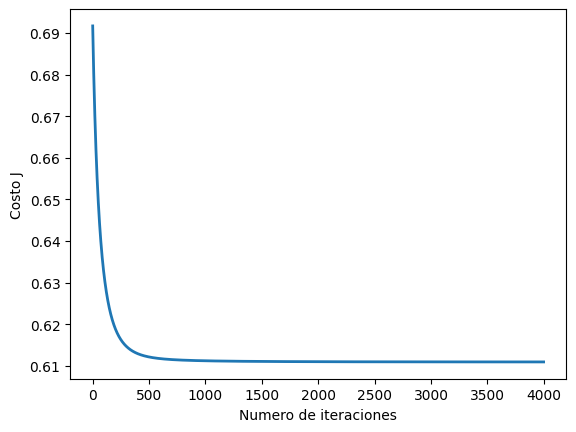

In [20]:

alpha = 0.03
num_iters = 4000

theta = np.zeros(19)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

Una vez obtenidos los valores de theta es que puede comenzar a realizarse la prueba, la cual será hecha con el 20% restante ya definidos al principio de la aplicación.
# Prueba de los datos

Primero los datos son normalizados

In [41]:
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape


[ 8.50475456  1.58070648  2.83177761  3.25354798  0.41402032  0.9614922
  0.78683352  3.96203999  3.27553528 12.50160112  0.41736561  1.69201105
  3.51467027  0.37859924  0.6723798   0.5966961   0.84610172  1.07060869]


Se añade la columna de x0 a x test

In [42]:
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)


Se aplica la función de la sigmoide a los datos y luego se los visualiza

In [43]:
esComestible = sigmoid(np.dot(X_test_norm, theta))
print(esComestible)
print(y_test)

[0.42543506 0.54253525 0.52901233 ... 0.48512163 0.39920652 0.47529646]
[1. 1. 1. ... 0. 0. 0.]


Podemos comprobar los valores de la prueba una vez que los datos de x_test están completos y también visualizar los datos de y_test

1 ------------> COMESTIBLE
0 ------------> VENENOSO

Podemos visualizar los datos obtnidos comparados con sus respectivas y para evaluar el entrenamiento

In [46]:
X_test_resultado = esComestible.copy()
print(X_test_resultado.shape[0])

y_test_resultado = y_test.copy()
X_test_resultado= X_test_resultado.reshape(-1, 1)
y_test_resultado= y_test_resultado.reshape(-1, 1)
X_test_resultado = np.concatenate([ X_test_resultado, y_test_resultado], axis=1)

comparacion = pd.DataFrame(X_test_resultado)

print(comparacion)

12214
              0    1
0      0.425435  1.0
1      0.542535  1.0
2      0.529012  1.0
3      0.498721  1.0
4      0.418176  1.0
...         ...  ...
12209  0.383557  0.0
12210  0.303552  0.0
12211  0.485122  0.0
12212  0.399207  0.0
12213  0.475296  0.0

[12214 rows x 2 columns]
